In [30]:
!pip install -q tensorflow
!pip install -q protobuf


In [31]:
import os
import zipfile
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt



# Connection au Drive et selection des images aux hasard

In [32]:


base = "/kaggle/input/dogs-vs-cats-redux-kernels-edition"
print("📂 Contenu du dossier de base :", os.listdir(base))

train_zip = os.path.join(base, "train.zip")
test_zip = os.path.join(base, "test.zip")

train_extract_path = "/kaggle/working/train"
test_extract_path = "/kaggle/working/test"

# Décompression train.zip
if not os.path.exists(train_extract_path) or len(os.listdir(train_extract_path)) == 0:
    print("📦 Extraction de train.zip...")
    with zipfile.ZipFile(train_zip, 'r') as zip_ref:
        zip_ref.extractall(train_extract_path)
    print("✅ train.zip décompressé avec succès")

# Décompression test.zip
if not os.path.exists(test_extract_path) or len(os.listdir(test_extract_path)) == 0:
    print("📦 Extraction de test.zip...")
    with zipfile.ZipFile(test_zip, 'r') as zip_ref:
        zip_ref.extractall(test_extract_path)
    print("✅ test.zip décompressé avec succès")

# 🔍 Vérifie la vraie structure du dossier
print("\n📁 Contenu de /kaggle/working/train :", os.listdir(train_extract_path))
print("📁 Contenu de /kaggle/working/test :", os.listdir(test_extract_path))

# 📸 Corrige le chemin s’il y a un sous-dossier "train" à l’intérieur
if "train" in os.listdir(train_extract_path):
    train_dir = os.path.join(train_extract_path, "train")
else:
    train_dir = train_extract_path

if "test" in os.listdir(test_extract_path):
    test_dir = os.path.join(test_extract_path, "test")
else:
    test_dir = test_extract_path

# Vérification finale
print("\n📸 Exemples de fichiers dans train :", os.listdir(train_dir)[:10])
print("📸 Exemples de fichiers dans test :", os.listdir(test_dir)[:10])


📂 Contenu du dossier de base : ['sample_submission.csv', 'train.zip', 'test.zip']

📁 Contenu de /kaggle/working/train : ['train']
📁 Contenu de /kaggle/working/test : ['test']

📸 Exemples de fichiers dans train : ['cat.6836.jpg', 'dog.4463.jpg', 'dog.11871.jpg', 'cat.2011.jpg', 'cat.5360.jpg', 'cat.828.jpg', 'dog.10283.jpg', 'cat.4387.jpg', 'cat.7448.jpg', 'cat.6691.jpg']
📸 Exemples de fichiers dans test : ['5109.jpg', '7368.jpg', '5749.jpg', '6367.jpg', '10253.jpg', '3588.jpg', '3455.jpg', '5090.jpg', '11408.jpg', '3592.jpg']


In [33]:
noms_fichiers = os.listdir(train_dir)
noms_fichiers

['cat.6836.jpg',
 'dog.4463.jpg',
 'dog.11871.jpg',
 'cat.2011.jpg',
 'cat.5360.jpg',
 'cat.828.jpg',
 'dog.10283.jpg',
 'cat.4387.jpg',
 'cat.7448.jpg',
 'cat.6691.jpg',
 'cat.8014.jpg',
 'dog.11529.jpg',
 'dog.8488.jpg',
 'cat.5966.jpg',
 'dog.3713.jpg',
 'dog.5628.jpg',
 'dog.3598.jpg',
 'dog.5264.jpg',
 'cat.4386.jpg',
 'cat.5822.jpg',
 'cat.2614.jpg',
 'cat.221.jpg',
 'cat.1085.jpg',
 'dog.3920.jpg',
 'dog.7153.jpg',
 'dog.2809.jpg',
 'cat.7902.jpg',
 'dog.4841.jpg',
 'dog.10713.jpg',
 'cat.1643.jpg',
 'cat.8918.jpg',
 'dog.10084.jpg',
 'cat.9239.jpg',
 'cat.5202.jpg',
 'cat.5241.jpg',
 'cat.12401.jpg',
 'dog.10516.jpg',
 'cat.8785.jpg',
 'dog.2715.jpg',
 'cat.6575.jpg',
 'dog.11306.jpg',
 'dog.12120.jpg',
 'cat.10127.jpg',
 'cat.7204.jpg',
 'dog.10105.jpg',
 'cat.5476.jpg',
 'dog.8091.jpg',
 'cat.10018.jpg',
 'dog.12174.jpg',
 'cat.12007.jpg',
 'dog.3600.jpg',
 'dog.2744.jpg',
 'dog.10183.jpg',
 'cat.9831.jpg',
 'cat.3113.jpg',
 'cat.9589.jpg',
 'dog.3603.jpg',
 'dog.1332.jpg',
 

In [34]:
# Initialiser une liste pour les catégories
categories = []

# Boucle pour assigner les catégories
for filename in noms_fichiers:
    # Obtenir la partie avant le premier point du nom de fichier
    categorie = filename.split('.')[0]
    # Vérifier si cette partie est "dog"
    if categorie == 'dog':
        # Ajouter 1 à la liste categories (indiquant que c'est une image de chien)
        categories.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de chat)
        categories.append(0)

In [35]:
categories

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [36]:
# creer un dataframe avec pandas

df = pd.DataFrame ({
    'filename': noms_fichiers,
    'categorie': categories
})

# Afficher le dataframe
print(df.head())

        filename  categorie
0   cat.6836.jpg          0
1   dog.4463.jpg          1
2  dog.11871.jpg          1
3   cat.2011.jpg          0
4   cat.5360.jpg          0


In [37]:
compte_categories = df["categorie"].value_counts()
noms_categories = ["chien", "chat"]
compte_categories

categorie
0    12500
1    12500
Name: count, dtype: int64

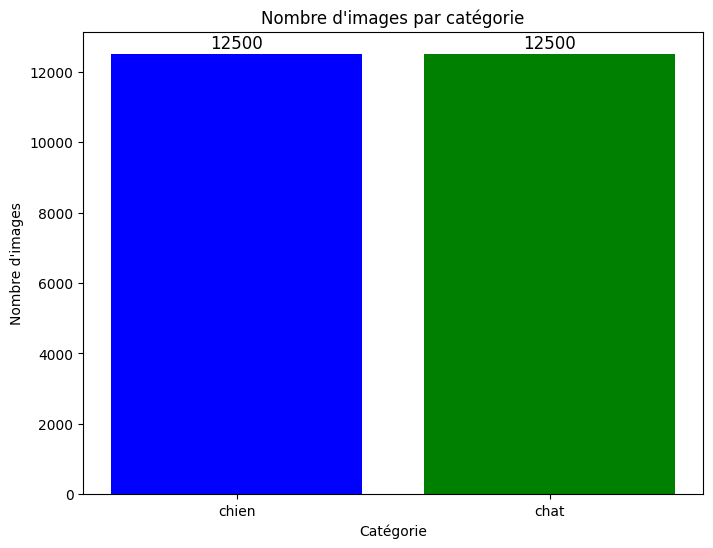

In [38]:
plt.figure(figsize=(8, 6))
couleurs = ['blue', 'green']  # Couleurs compréhensibles
plt.bar(noms_categories, compte_categories, color=couleurs)
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par catégorie')
for i, v in enumerate(compte_categories):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=12, color='black')

In [39]:
# Sélectionner une image aléatoire
# Sélectionner une image aléatoire
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'/kaggle/working/train/train/dog.7497.jpg'

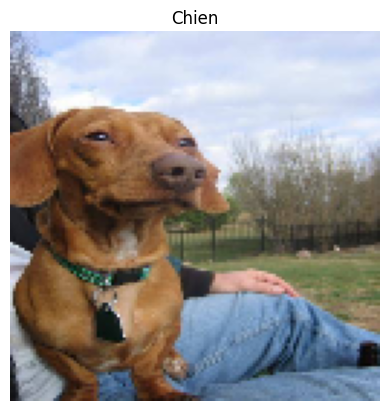

In [40]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
categorie = 'Chien' if 'dog' in image_aleatoire else 'Chat'
plt.title(categorie)
plt.axis('off')
plt.show()

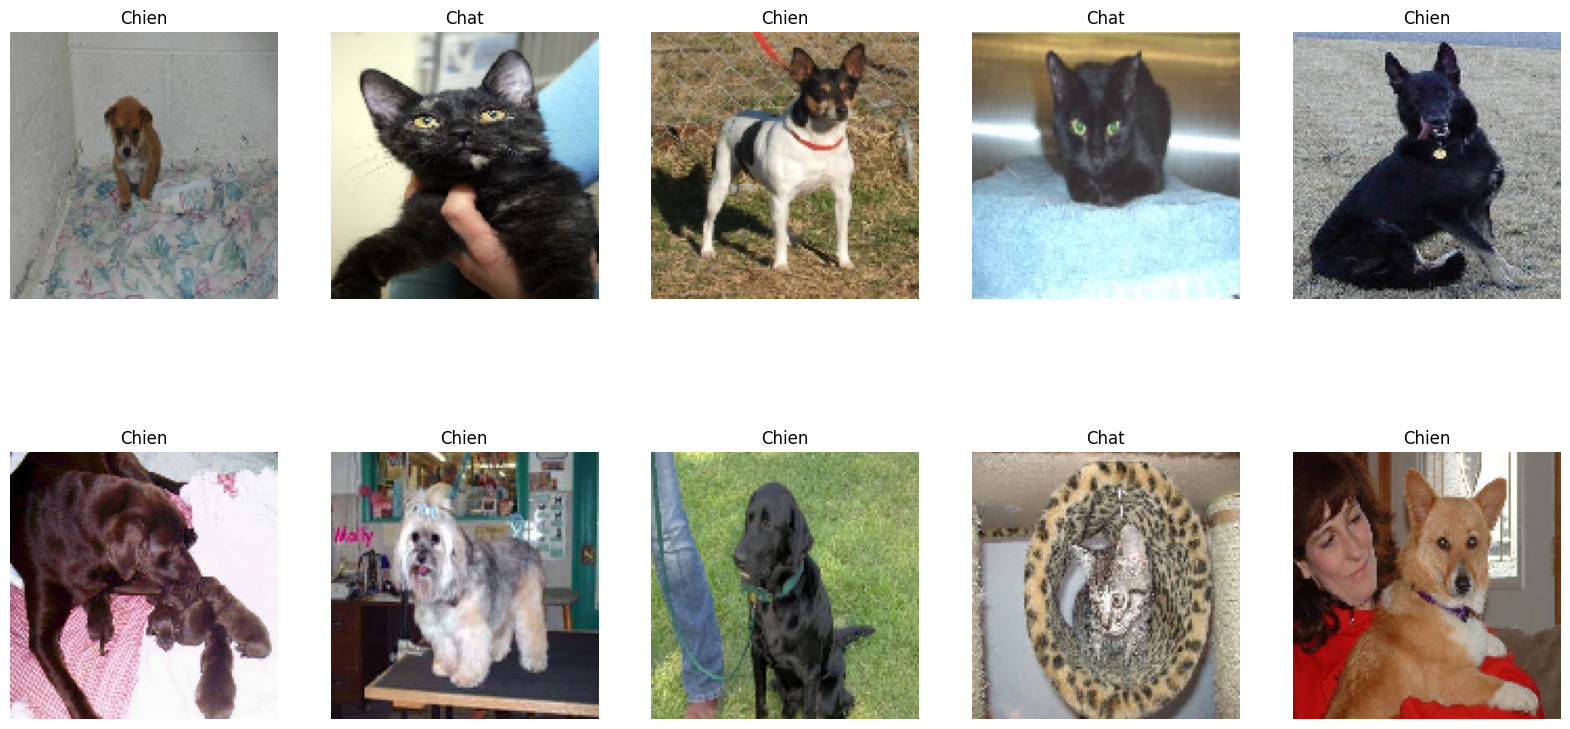

In [41]:
# Sélectionner 10 images aléatoires
random_images = df.sample(n=10)

# Afficher les 10 images aléatoires
plt.figure(figsize=(20, 10))

for i, row in enumerate(random_images.iterrows()):
    filename = row[1]['filename']
    category = 'Chien' if row[1]['categorie'] == 1 else 'Chat'
    img_path = os.path.join(train_dir, filename)
    img = image.load_img(img_path, target_size=(128, 128))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()

# Construction du model

In [42]:
# Sélectionner aléatoirement 1500 images de chats (catégorie 0)
chats_df = df[df['categorie'] == 0].sample(n=1500, random_state=42)

# Sélectionner aléatoirement 1500 images de chiens (catégorie 1)
chiens_df = df[df['categorie'] == 1].sample(n=1500, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([chats_df, chiens_df]).reset_index(drop=True)
df_final

filename  categorie
0     cat.12217.jpg          0
1      cat.4090.jpg          0
2      cat.2477.jpg          0
3      cat.3448.jpg          0
4      cat.4394.jpg          0
...             ...        ...
2995    dog.722.jpg          1
2996    dog.992.jpg          1
2997  dog.11344.jpg          1
2998   dog.3472.jpg          1
2999  dog.10689.jpg          1

[3000 rows x 2 columns]

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Ré-échelle les valeurs des pixels entre 0 et 255 à l'intervalle 0,1
    validation_split=0.2, # 20% des données pour la validation
)

In [44]:
# S'assurer que la colonne 'category' contient des chaînes de caractères
df_final['categorie'] = df_final['categorie'].astype(str)

# Générateur pour les données d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    df_final,
    train_dir,
    x_col='filename',
    y_col='categorie',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Utiliser les données d'entrainnement
)

Found 2400 validated image filenames belonging to 2 classes.


In [45]:
# Générateur pour les données de validation
validation_generator = train_datagen.flow_from_dataframe(
    df_final,
    train_dir,
    x_col='filename',
    y_col='categorie',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Utiliser les données de validation
)

Found 600 validated image filenames belonging to 2 classes.


Taille du lot de données : (32, 150, 150, 3)
Taille du lot d'étiquettes : (32,)


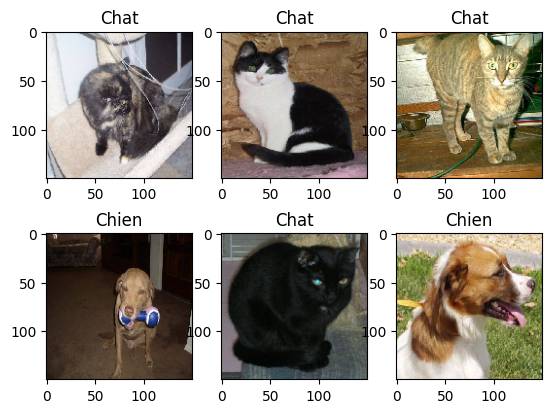

In [46]:
for data_batch, labels_batch in train_generator:
    print("Taille du lot de données :", data_batch.shape)  # Affiche la forme du lot de données
    print("Taille du lot d'étiquettes :", labels_batch.shape)  # Affiche la forme du lot d'étiquettes
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(data_batch[i])  # Affiche l'image prétraitée
        plt.title("Chat" if labels_batch[i] == 0 else "Chien")  # Titre en fonction de l'étiquette
    plt.show()
    break  # Affiche un seul lot d'images

In [47]:
model = models.Sequential()

# Ajouter les couches une par une

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Couche de convolution : 32 filtres de 3x3, détecte des motifs simples dans l'image, ReLU pour rendre le modèle non-linéaire, forme d'entrée (150x150x3).

model.add(layers.MaxPooling2D((2, 2)))  # Couche de max pooling : réduit les dimensions de l'image en prenant le maximum de chaque carré de 2x2 pixels.

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Deuxième couche de convolution : 64 filtres de 3x3, détecte des motifs plus complexes, ReLU pour l'activation.

model.add(layers.MaxPooling2D((2, 2)))  # Deuxième couche de max pooling : réduit encore les dimensions de l'image.

model.add(layers.Flatten())  # Couche Flatten : transforme les données 2D en un vecteur 1D pour la couche dense suivante.

model.add(layers.Dense(512, activation='relu'))  # Couche dense (fully connected) : 512 neurones, chaque neurone est connecté à tous les neurones de la couche précédente, ReLU pour l'activation.

model.add(layers.Dense(1, activation='sigmoid'))  # Couche de sortie : 1 neurone, activation sigmoïde pour produire une probabilité entre 0 et 1, utilisée pour la classification binaire (chat ou chien).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762615662.726140      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,487,745 (162.08 MB)

 Trainable params: 42,487,745 (162.08 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
optimi = optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimi,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
# Entraînement du modèle et sauvegarde de l'historique d'entraînement dans 'history'
history = model.fit(
    train_generator,  # Utilise le générateur pour les données d'entraînement

    # Le nombre d'étapes (batches) à exécuter à chaque époque.
    # Calculé comme le nombre total d'échantillons d'entraînement divisé par la taille du lot.
    steps_per_epoch=train_generator.samples // train_generator.batch_size,

    epochs=30,  # Nombre total d'époques pour l'entraînement

    validation_data=validation_generator,  # Utilise le générateur pour les données de validation

    # Le nombre d'étapes (batches) à exécuter pour chaque époque de validation.
    # Calculé comme le nombre total d'échantillons de validation divisé par la taille du lot.
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1762615665.122297     174 service.cc:148] XLA service 0x7e576000b6a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762615665.122922     174 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762615665.349465     174 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/75 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4369 - loss: 1.6321

I0000 00:00:1762615667.544344     174 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.5543 - loss: 0.9791 - val_accuracy: 0.0000e+00 - val_loss: 1.2304
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.6489 - loss: 0.6210 - val_accuracy: 0.5625 - val_loss: 0.7029
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6654 - loss: 0.6091 - val_accuracy: 0.6441 - val_loss: 0.6616
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6785 - loss: 0.5776 - val_accuracy: 0.0556 - val_loss: 1.2628
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7130 - loss: 0.5555 - val_accuracy: 0.5642 - val_loss: 0.7363
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7347 - loss: 0.5315 - val_accuracy: 0.4444 - val_loss: 0.8360
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7727 - loss: 0.4907 - val_accuracy: 0.7465 - val_loss: 0.5655
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7760 - loss: 0.4744 - val_accuracy: 0.4826 - val_loss

In [51]:
# Évaluer les performances du modèle sur la base de validation
validation_steps = validation_generator.samples // validation_generator.batch_size
evaluation = model.evaluate(validation_generator, steps=validation_steps)

# Afficher les résultats de l'évaluation
print(f"Perte sur la validation: {evaluation[0]}")
print(f"Précision sur la validation: {evaluation[1]}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5670 - loss: 1.3938
Perte sur la validation: 1.4081778526306152
Précision sur la validation: 0.5711805820465088


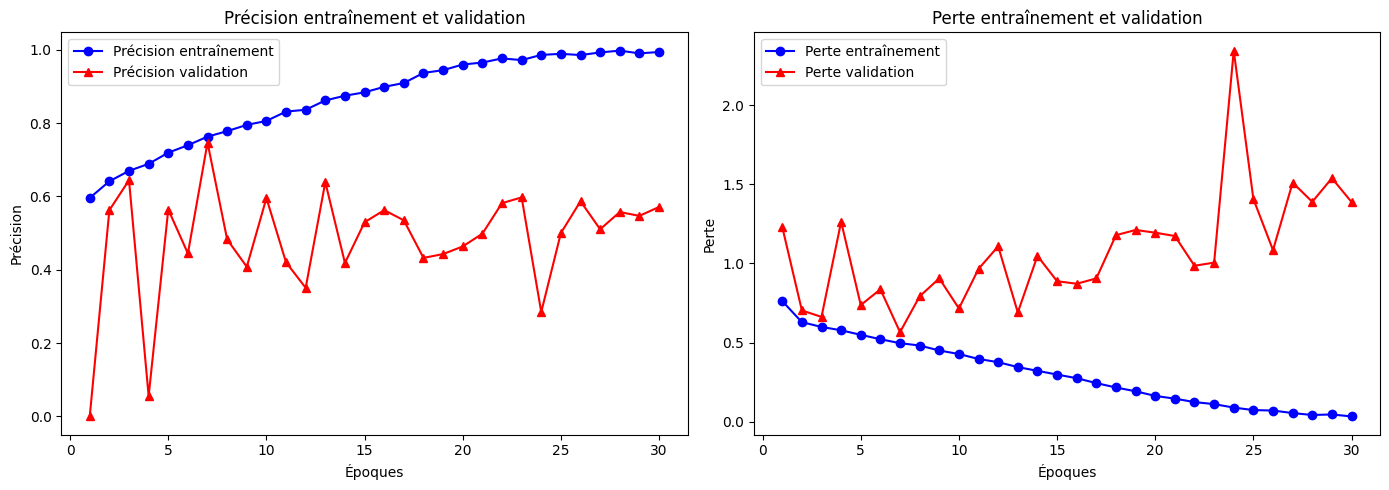

In [52]:

# Récupérer les données de l'historique
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


# Tracer la courbe de précision
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Précision entraînement')  # 'bo-' : bleu avec des points et lignes
plt.plot(epochs, val_acc, 'r^-', label='Précision validation')  # 'r^-' : rouge avec des triangles et lignes
plt.title('Précision entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Tracer la courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Perte entraînement')  # 'bo-' : bleu avec des points et lignes
plt.plot(epochs, val_loss, 'r^-', label='Perte validation')  # 'r^-' : rouge avec des triangles et lignes
plt.title('Perte entraînement et validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
from keras.models import load_model

# Chemin où vous voulez sauvegarder votre modèle
save_path = '/content/drive/MyDrive/dogs-vs-cats/cats_and_dogs_model.h5'

# Supposons que 'model' est votre modèle que vous avez entraîné
model.save(save_path)

print(f"Modèle sauvegardé à l'emplacement : {save_path}")

Modèle sauvegardé à l'emplacement : /content/drive/MyDrive/dogs-vs-cats/cats_and_dogs_model.h5


In [56]:
from keras.utils import load_img, img_to_array

# Charger le modèle sauvegardé
model = load_model('/content/drive/MyDrive/dogs-vs-cats/cats_and_dogs_model.h5')

# Sélectionner aléatoirement 10 images de chats (catégorie 0)
chats_df = df[df['categorie'] == 0].sample(n=10, random_state=42)

# Sélectionner aléatoirement 10 images de chiens (catégorie 1)
chiens_df = df[df['categorie'] == 1].sample(n=10, random_state=42)

# Combiner les deux DataFrames
df_final = pd.concat([chats_df, chiens_df]).reset_index(drop=True)

# S'assurer que la colonne 'category' contient des chaînes de caractères
df_final['categorie'] = df_final['categorie'].astype(str)
df_final

filename categorie
0   cat.12217.jpg         0
1    cat.4090.jpg         0
2    cat.2477.jpg         0
3    cat.3448.jpg         0
4    cat.4394.jpg         0
5    cat.9289.jpg         0
6    cat.1226.jpg         0
7    cat.6682.jpg         0
8    cat.8721.jpg         0
9    cat.3789.jpg         0
10   dog.5441.jpg         1
11    dog.618.jpg         1
12   dog.8732.jpg         1
13  dog.10843.jpg         1
14   dog.8699.jpg         1
15   dog.5192.jpg         1
16  dog.12282.jpg         1
17   dog.7602.jpg         1
18   dog.3418.jpg         1
19   dog.8407.jpg         1

In [60]:
# Générateur pour les données de test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_final,
    directory="/kaggle/working/train/train",
    x_col='filename',
    y_col='categorie',
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary',
    shuffle=False  # Ne pas mélanger les données de test
)

# Faire des prédictions
predictions = model.predict(test_generator)

Found 20 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step 


In [61]:
# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Ajouter les prédictions au DataFrame
df_final['predictions'] = predicted_classes
df_final

filename categorie  predictions
0   cat.12217.jpg         0            1
1    cat.4090.jpg         0            1
2    cat.2477.jpg         0            0
3    cat.3448.jpg         0            1
4    cat.4394.jpg         0            0
5    cat.9289.jpg         0            1
6    cat.1226.jpg         0            1
7    cat.6682.jpg         0            0
8    cat.8721.jpg         0            0
9    cat.3789.jpg         0            1
10   dog.5441.jpg         1            1
11    dog.618.jpg         1            1
12   dog.8732.jpg         1            1
13  dog.10843.jpg         1            1
14   dog.8699.jpg         1            1
15   dog.5192.jpg         1            1
16  dog.12282.jpg         1            1
17   dog.7602.jpg         1            1
18   dog.3418.jpg         1            1
19   dog.8407.jpg         1            1

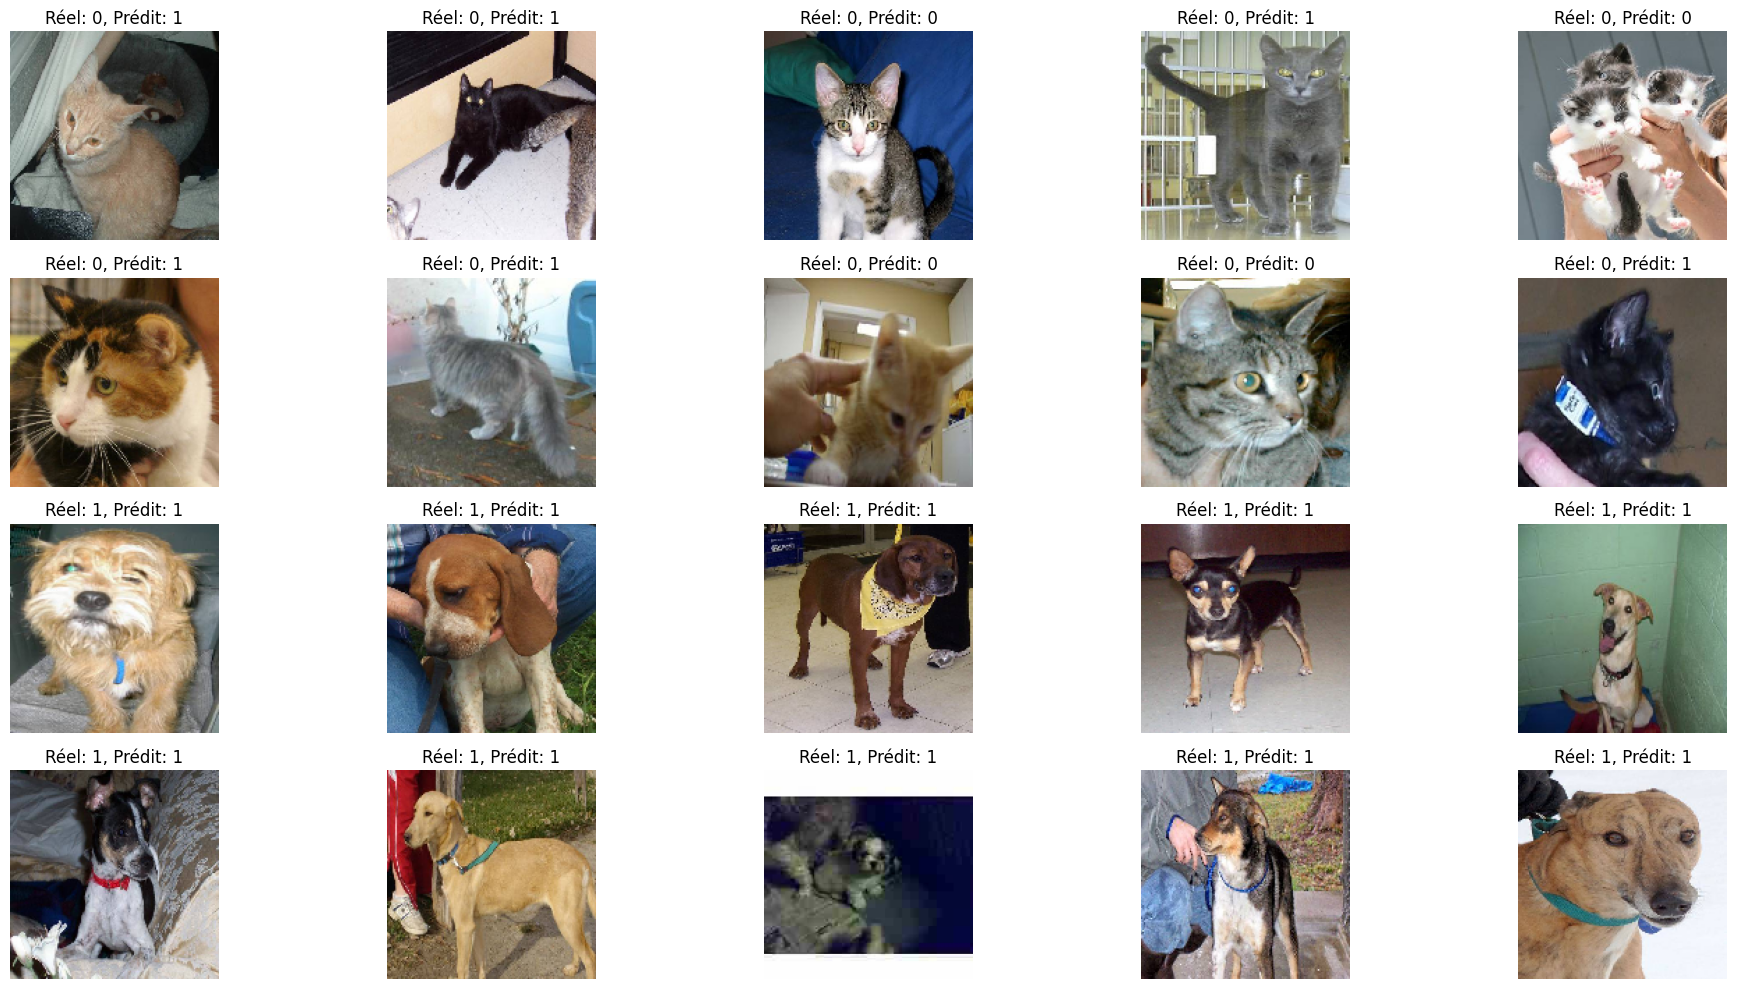

In [65]:
# Afficher les résultats pour les 20 images (10 chats et 10 chiens)
plt.figure(figsize=(20, 10))
for i, row in df_final.iterrows():
    img_path = f"/kaggle/working/train/train/{row['filename']}"
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Réel: {row['categorie']}, Prédit: {row['predictions']}")
    plt.axis('off')

plt.tight_layout()
plt.show()